# Red neuronal - Tensorflow
Se importan las libraries necesarias para trabajar con TensorFlow y realizar operaciones numéricas, manejar datos en formato de matriz y realizar visualizaciones gráficas.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Se cargan las matrices que se utilizaron previamente en backpropagation, observándose un total de 230 fotos correspondientes a 10 fotos por cada uno de los 23 alumnos de la Maestría en Ciencia en Datos.

In [3]:
train_img = np.load('x_pca_reduc.npy')
test_img  = np.load('x_pca_test_reduc.npy')
print("X_train shape", train_img.shape)
print("X_test shape", test_img .shape)

X_train shape (230, 39)
X_test shape (23, 39)


Del mismo modo, se cargan las matrices con las etiquetas de los nombres del dataset correspondiente al entrenamiento y al testeo

In [4]:
y_train = np.load('nombres.npy')
y_test  = np.load('nombres_test.npy')
print("y_train shape", y_train.shape)
print("y_test shape", y_test .shape)

y_train shape (230,)
y_test shape (23,)


El codificador OneHotEncoder de scikit-learn para convertir las etiquetas categóricas en una representación binaria. Se aplica a los conjuntos de entrenamiento y prueba, transformando las etiquetas en matrices con columnas que indican la presencia de cada categoría.

In [8]:
encoder = OneHotEncoder()
y_train_ohe = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_ohe = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

# Creando la red

Se crea una instancia del modelo llamado m1. Luego se agregan capas al modelo: una capa de entrada con una forma de entrada de 39, una capa oculta con 39 neuronas y una función de activación sigmoide, y finalmente una capa de salida con 23 neuronas y una función de activación softmax. Este modelo es adecuado para problemas de clasificación de 23 alumnos.

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

m1 = keras.models.Sequential()

# Input layer
m1.add(keras.layers.InputLayer(input_shape=(39,)))

# 1 capa oculta 
m1.add(keras.layers.Dense(39, activation='sigmoid'))

# Capa de salida
m1.add(keras.layers.Dense(23, activation='softmax'))

In [12]:
keras.utils.plot_model(m1, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Compile

A continuación el código compila el modelo m1 para entrenar y evaluar utilizando la función de pérdida 'categorical_crossentropy' y métricas adicionales como 'accuracy' (exactitud) y 'Recall' (sensibilidad). Esto permite monitorear la precisión y la capacidad del modelo para detectar correctamente los casos de la clase específica durante el entrenamiento y la evaluación.

In [13]:
m1.compile(loss = 'categorical_crossentropy', metrics=['accuracy'])

El siguiente código implementa el uso de Early Stopping como una herramienta para detener el entrenamiento del modelo si no se observa una mejora en la función de pérdida del conjunto de validación durante un número determinado de épocas. Esto ayuda a evitar el sobreajuste y a seleccionar el mejor conjunto de pesos para el modelo.

In [14]:
early = keras.callbacks.EarlyStopping(patience = 8, 
                                      monitor = 'val_loss', 
                                      restore_best_weights = True)
ajuste = m1.fit(epochs = 100, 
                x = train_img, 
                y = y_train_ohe, 
                validation_data = (test_img, y_test_ohe), 
                callbacks=[early,])

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 3.1363 - accuracy: 0.0348 - val_loss: 3.1341 - val_accuracy: 0.0435
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 3.0288 - accuracy: 0.0565 - val_loss: 3.0745 - val_accuracy: 0.0870
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 2.9561 - accuracy: 0.1000 - val_loss: 3.0205 - val_accuracy: 0.1304
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 2.8917 - accuracy: 0.1348 - val_loss: 2.9721 - val_accuracy: 0.1304
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 2.8338 - accuracy: 0.1957 - val_loss: 2.9257 - val_accuracy: 0.1304
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 2.7760 - accuracy: 0.2913 - val_loss: 2.8834 - val_accuracy: 0.1304
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 2.7222 - accuracy: 0.3478 - val_loss: 2.8427 - val_accuracy: 0.1739
Epoch 8/100
8/8 [=========

La siguiente gráfica muestra una tendencia creciente del accuracy, tanto para el modelo de entrenamiento y para validación. Durante el entrenamiento, a partir de la época 4 hay una mejora en el accuracy del modelo de entrenamiento ya que empieza a ubicarse por encima del modelo de validación.

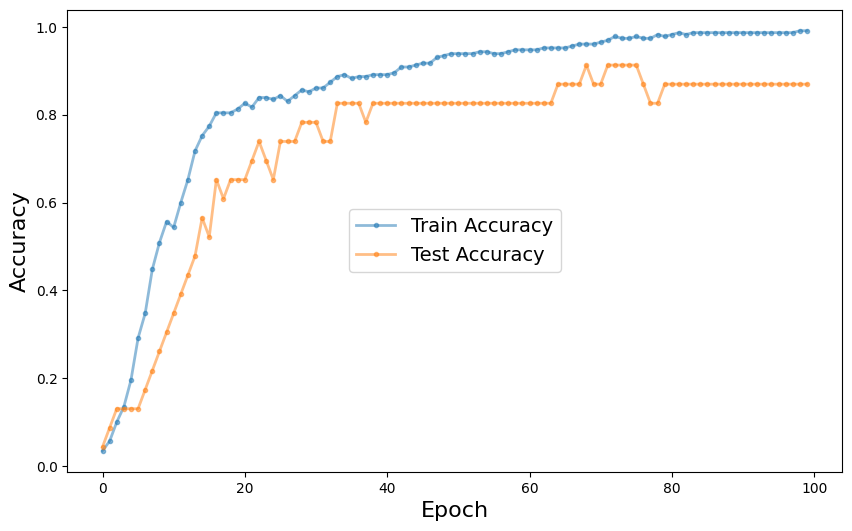

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
kw = {'marker': '.', 'lw': 2, 'alpha': 0.5}
l0, = ax.plot(ajuste.history['accuracy'], label='Train Accuracy', **kw)
l1, = ax.plot(ajuste.history['val_accuracy'], label='Test Accuracy', **kw)

ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)

ax.legend(handles=[l0, l1], loc='center', fontsize=14)
plt.show()


Asimismo, se observa una disminución en cuanto al Error del entrenamiento y validación, este decrece a medida que aumenten las épocas del modelo entrenado.

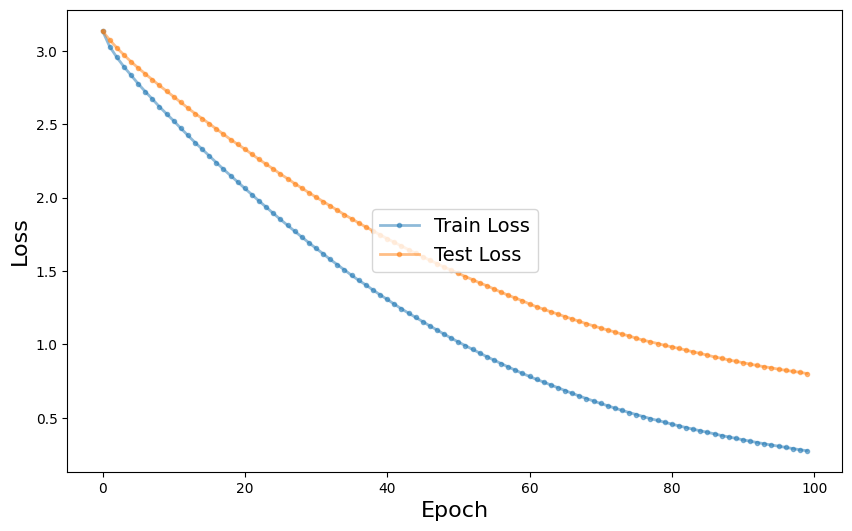

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
kw = {'marker': '.', 'lw': 2, 'alpha': 0.5}
l0, = ax.plot(ajuste.history['loss'], label='Train Loss', **kw)
l1, = ax.plot(ajuste.history['val_loss'], label='Test Loss', **kw)

ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)

ax.legend(handles=[l0, l1], loc='center', fontsize=14)
plt.show()


# Predicción

Para esta sección se utiliza la función m1.evaluate( ), para evaluar el rendimiento de un modelo de red neuronal en un conjunto de datos de prueba. Para ello se toma en cuenta el dataset de testeo (test_img) con sus etiquetas correspondientes (y_test_ohe).

In [17]:
m1.evaluate(test_img, y_test_ohe)

1/1 [==============================] - 0s 24ms/step - loss: 0.8014 - accuracy: 0.8696


[0.801430344581604, 0.8695651888847351]

Se calculan las predicciones y se obtiene el índice de la clase con la mayor probabilidad. Entonces se comparan las predicciones y las etiquetas verdaderas. 


In [18]:
y_predicho = np.argmax(m1.predict(test_img), axis=1)
y_testeo = np.argmax(y_test_ohe, axis=1).reshape(-1, )
error_i = (y_predicho - y_testeo != 0)

# Cuántos hay
print('En total el modelo presenta {} errores en el dataset de testeo donde hay un total de {} imagenes.'.format(np.sum(error_i), len(test_img)))

1/1 [==============================] - 0s 76ms/step
En total el modelo presenta 3 errores en el dataset de testeo donde hay un total de 23 imagenes.


In [19]:
# Crear una lista para almacenar los resultados de cada predicción
tabla_resultados = pd.DataFrame({'Clase Real':y_test[y_testeo], 'Clase Predicha': y_test[y_predicho]})

# Agregar la tercera columna de comparación
tabla_resultados['Predicción correcta'] = tabla_resultados['Clase Real'] == tabla_resultados['Clase Predicha']


# Reemplazar los valores de las etiquetas en la columna "Clase Real"
nuevos_valores = {'ad': 'Andres', 'cp': 'Claudia','ec': 'Elemir','ep': 'Eduardo','fh': 'Fernanda','gf': 'Geronimo','hg': 'Hernan','ja': 'Julieta','jm': 'Jiang','jp': 'Josefina','jt': 'Joaquin','lm': 'Lujan','mf': 'Maribel','mg': 'Marcelo G.','mk': 'Marisa','ml': 'Maira','mt': 'Marcelo T.','nl': 'Nestor','ob': 'Oscar','rb': 'Ramon','re': 'Rodrigo','sp': 'Sebastian','ss': 'Silvia'}
tabla_resultados['Clase Real'].replace(nuevos_valores, inplace=True)
tabla_resultados['Clase Predicha'].replace(nuevos_valores, inplace=True)

# Mostrar la tabla
print(tabla_resultados)

    Clase Real Clase Predicha  Predicción correcta
0       Andres         Andres                 True
1      Claudia       Fernanda                False
2       Elemir         Elemir                 True
3      Eduardo        Eduardo                 True
4     Fernanda       Fernanda                 True
5     Geronimo       Geronimo                 True
6       Hernan         Hernan                 True
7      Julieta        Claudia                False
8        Jiang          Jiang                 True
9     Josefina       Fernanda                False
10     Joaquin        Joaquin                 True
11       Lujan          Lujan                 True
12     Maribel        Maribel                 True
13  Marcelo G.     Marcelo G.                 True
14      Marisa         Marisa                 True
15       Maira          Maira                 True
16  Marcelo T.     Marcelo T.                 True
17      Nestor         Nestor                 True
18       Oscar          Oscar  